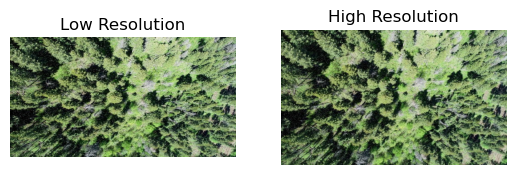

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')

# Define the multiscale options
scales = [(470, 250), (1666, 1000)]

# Display the images in a 1x2 grid
fig, axs = plt.subplots(1, 2)

for j, scale in enumerate(scales):
    # Resize the image using nearest neighbor interpolation
    resized_image = cv2.resize(original_image, scale, interpolation=cv2.INTER_NEAREST)
    
    # Display the resized image
    axs[j].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    
    # Set the title to highlight the difference
    if j == 0:
        axs[j].set_title('Low Resolution')
    else:
        axs[j].set_title('High Resolution')
    
    axs[j].axis('off')

plt.show()

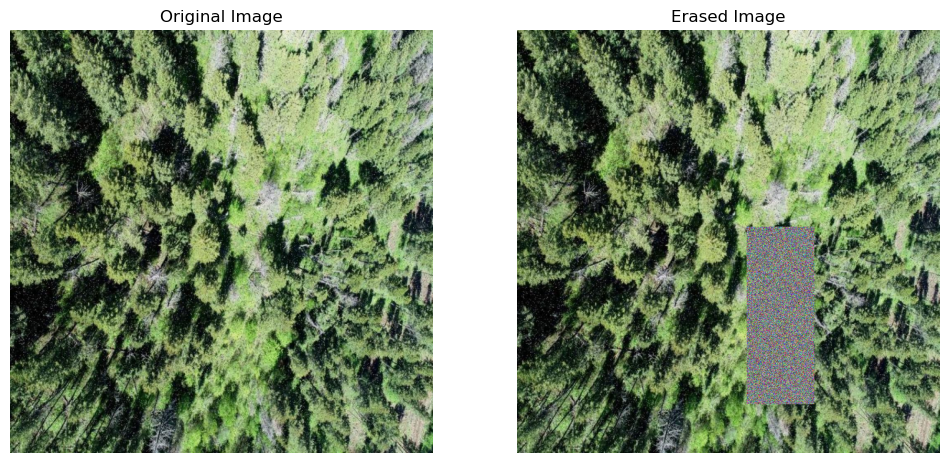

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

def random_erasing(img, p=0.5, sl=0.02, sh=0.4, r1=0.3, r2=3.3, inplace=False):
    """
    Apply Random Erasing to an image.

    Args:
    - img (PIL Image or numpy.ndarray): Image to be erased.
    - p (float): Probability of applying Random Erasing.
    - sl (float): Minimum proportion of erased area against input image.
    - sh (float): Maximum proportion of erased area against input image.
    - r1 (float): Minimum aspect ratio of erased area.
    - r2 (float): Maximum aspect ratio of erased area.
    - inplace (bool): Whether to apply the operation in-place or return a new image.

    Returns:
    - PIL Image or numpy.ndarray: Erased image.
    """
    if np.random.rand() > p:
        return img

    img = np.array(img)

    h, w, c = img.shape
    area = h * w

    target_area = np.random.uniform(sl, sh) * area
    aspect_ratio = np.random.uniform(r1, r2)

    h = int(round(np.sqrt(target_area * aspect_ratio)))
    w = int(round(np.sqrt(target_area / aspect_ratio)))

    if h < len(img) and w < len(img[0]):
        i = np.random.randint(0, len(img) - h)
        j = np.random.randint(0, len(img[0]) - w)
        erased_img = np.copy(img)
        erased_img[i:i + h, j:j + w, :] = np.random.randint(0, 256, (h, w, c))
        if inplace:
            return erased_img
        else:
            return erased_img.astype(np.uint8)
    else:
        return img

# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')

# Apply Random Erasing
erased_image = random_erasing(original_image)

# Display the images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(erased_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Erased Image')
axs[1].axis('off')
plt.savefig('erased_image.png')
plt.show()